# Machine learning - Assignment 
    
#### IT number - IT19099132
#### Name         - Rajakaruna R.W.P.C 

## Laptop price prediction with Decision Tree

#### Importing python libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import svm

#### Import data set

In [14]:
df = pd.read_csv('../base_dataset/laptop_data.csv')
df.head()
df.size

16926

#### Data visualization

<AxesSubplot:xlabel='Price', ylabel='Count'>

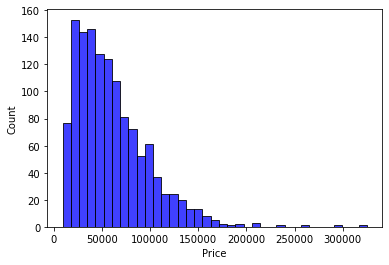

In [15]:
# histogram of price distribution.
sn.histplot(df['Price'],color='blue')

C:\Users\pasin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

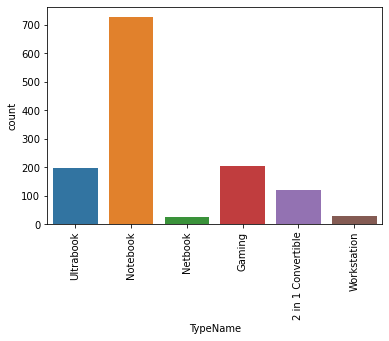

In [16]:
# plot of laptops type data.
sn.countplot(df['TypeName'])
plt.xticks(rotation = 'vertical')

C:\Users\pasin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


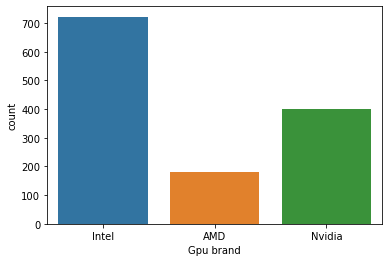

In [17]:
# Plot of GPU manufacture information.
sn.countplot(df['Gpu brand'])
plt.show()


In [18]:
# Get cpu manufacture data from main data set.
cpuManufacture = df['CPU_name'].str.split(' ',n = 1,expand=True)
cpuManufacture.head()
df['CPU manufacture'] = cpuManufacture[0]

<AxesSubplot:ylabel='None'>

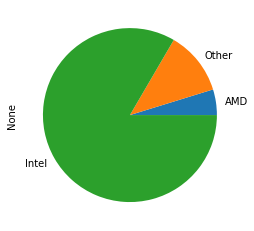

In [19]:
# Plot of CPU manufacture details
cpuValue = df.value_counts('CPU manufacture')
cpuValue.sort_values().plot(kind='pie')

#### Data augmentation - Experiment

##### Create label encoder

In [20]:
labeledTypeName = LabelEncoder()
labeledCpuName = LabelEncoder()
labeledComapnyName = LabelEncoder()

In [21]:
df['Type'] = labeledTypeName.fit_transform(df['TypeName'])
df['CPU_manufacture_type'] = labeledComapnyName.fit_transform(df['CPU manufacture'])
df['Company_Type'] = labeledCpuName.fit_transform(df['Company'])

### Modified data set

In [22]:
df.head(6)

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price,CPU manufacture,Type,CPU_manufacture_type,Company_Type
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832,Intel,4,1,1
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232,Intel,4,1,1
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000,Intel,3,1,7
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360,Intel,4,1,1
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080,Intel,4,1,1
5,Acer,Notebook,4,Windows,2.10,0,0,100.454670,AMD Processor,500,0,AMD,21312.0000,AMD,3,0,0


In [23]:
# check NULL values.
df.isnull().sum()


Company                 0
TypeName                0
Ram                     0
OpSys                   0
Weight                  0
TouchScreen             0
IPS                     0
PPI                     0
CPU_name                0
HDD                     0
SSD                     0
Gpu brand               0
Price                   0
CPU manufacture         0
Type                    0
CPU_manufacture_type    0
Company_Type            0
dtype: int64

####  Training and testing values

In [24]:
# X and Y values.
# x = df.drop(['Price', 'Company', 'TypeName', 'OpSys', 'CPU_name', 'CPU manufacture', 'Gpu brand'], axis=1).values
# y = df['Price'].values

# Newer data splitting method.
train = df.drop(['Price'], axis=1)
# Only change here is usage of np.log().
testing = np.log(df['Price'])

In [25]:
# Validating the X dataset
train

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,CPU manufacture,Type,CPU_manufacture_type,Company_Type
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Intel,4,1,1
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Intel,4,1,1
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Intel,3,1,7
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Intel,4,1,1
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Intel,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Intel,0,1,10
1298,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Intel,0,1,10
1299,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Other,3,2,10
1300,HP,Notebook,6,Windows,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Intel,3,1,7


In [26]:
# Validating the Y dataset
testing

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1297    10.433899
1298    11.288115
1299     9.409283
1300    10.614129
1301     9.886358
Name: Price, Length: 1302, dtype: float64

In [27]:
# Split data .
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, testing, test_size=0.15, random_state=2) # Change the values appropriately for the each model.

#### Pipeline and mapper 

In [28]:
mapper = {i:value for i,value in enumerate(x_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu brand',
 12: 'CPU manufacture',
 13: 'Type',
 14: 'CPU_manufacture_type',
 15: 'Company_Type'}

# Machine learning model

####  Importing libraries

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import r2_score

#### Creating model

In [30]:
# Select the number of columns.
selected_columns = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[13,14,12,11,8,3,1,0])
],remainder='passthrough')

# Create the model as a another layer in the pipeline
decision_tree_regression_model = DecisionTreeRegressor(
    min_samples_split=10,
    max_features="auto",
    random_state=2,
    max_depth=9
)

# Create the pipeline to connect the layers.
pipe = Pipeline([
    ('step1',selected_columns),
    ('step2',decision_tree_regression_model)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score :',metrics.r2_score(y_test,y_pred))
print('MAE : ',metrics.mean_absolute_error(y_test,y_pred))

R2 score : 0.855239413122889
MAE :  0.1811768778903807


#### Prediction and evaluate the accuracy

In [31]:
# train model predict result
y_pred = pipe.predict(x_test)
# Evaluate accurecy with r2 score
r2_score(y_test, y_pred)

0.855239413122889

In [32]:
# Evaluate the margin of error.
df_py = pd.DataFrame({'Actual Price': y_test, 'Predicted value': y_pred, 'Margin of error': y_test-y_pred})
df_py[0:10]

,Actual Price,Predicted value,Margin of error
248,10.490274,10.819711,-0.329437
555,9.387207,9.766215,-0.379008
1250,9.964522,9.766215,0.198307
547,10.111883,10.090874,0.021009
885,11.470547,11.223163,0.247384
761,11.503355,11.497866,0.005489
333,10.082584,10.041876,0.040708
733,10.301710,10.547022,-0.245311
653,11.058781,11.079210,-0.020429
1197,9.581363,9.766215,-0.184852


In [33]:
df_py[10:20]

,Actual Price,Predicted value,Margin of error
824,11.511925,11.315303,0.196622
994,10.765658,10.874416,-0.108758
757,11.328643,11.458085,-0.129442
715,10.729081,10.882998,-0.153918
707,11.501201,11.175325,0.325876
235,10.776844,11.135426,-0.358582
477,11.193738,11.102077,0.091661
1102,9.317895,9.766215,-0.448320
738,11.622622,11.446981,0.175641
840,11.470547,11.446981,0.023566


#### Error and accuracy of predicted result

In [34]:
# Mean Absolute errors (MAE)
errors = abs(y_pred - y_test)
print('MAE:', round(np.mean(errors), 2), 'degrees.')

# Absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

MAE: 0.18 degrees.
Accuracy: 98.31 %.


#### Actual and predicted value difference.

C:\Users\pasin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pasin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


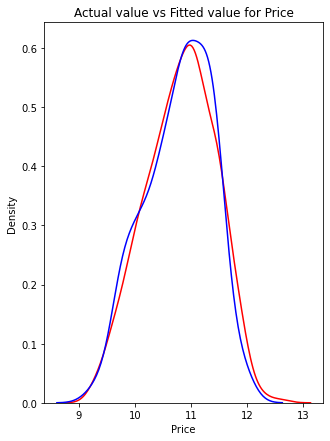

In [35]:
import seaborn as sns
plt.figure(figsize=(5, 7))

ax = sns.distplot(testing, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual value vs Fitted value for Price')

plt.show()
plt.close()